In [ ]:
# Analysis question 1
# How do the overall comparisons of price and volume changes across the markets look like?

In [2]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
data = sqlContext.read.csv('data.csv',header=False)
data.show(5)
# Order of columns
# 'DATE', 'C_PCP', 'C_TMVCP', 'N_PCP', 'N_TMVCP', 'SP_PCP', 'SP_TMVCP', 'NT_PCP', 'NT_TMVCP'

+----------+-------------------+------------------+-------------------+------------------+--------------------+-------------------+-------------------+-------------------+
|       _c0|                _c1|               _c2|                _c3|               _c4|                 _c5|                _c6|                _c7|                _c8|
+----------+-------------------+------------------+-------------------+------------------+--------------------+-------------------+-------------------+-------------------+
|02-07-2018|  5.121125072620959| 9.193665598572519|-1.4197329157191518|               0.0|   -6.92142945367664|                0.0|-1.3828243249559322|                0.0|
|03-07-2018|-1.7263876931070241|  3.88579704445608|-0.7503701677520215|-34.69465041770667|-0.38754218086889713|-31.618496889332604|-1.4233110883018818| -32.83890509077797|
|05-07-2018|-0.7984669906309387| 5.925269446030441| 1.2241598859767095| 70.59531435527903|  0.9503111182226929|  58.35068850659227|  1.61599

In [9]:
data = data.rdd.map(lambda x: (x[0],float(x[1]),float(x[2]),float(x[3]),float(x[4]),float(x[5]),float(x[6]),float(x[7]),float(x[8])) )

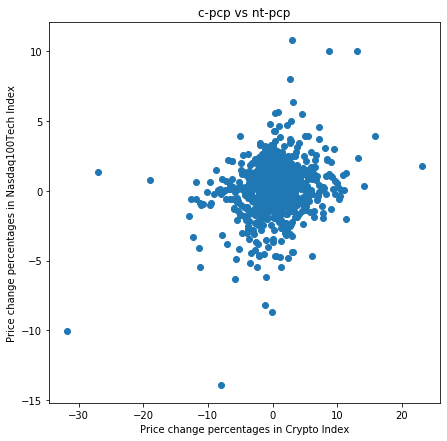

In [10]:
# Scatter plots
import matplotlib.pyplot as plt 
# c-pcp vs n_pcp
cpcp = data.map(lambda x: x[1]).collect()
npcp = data.map(lambda x: x[3]).collect()
fig1 = plt.figure(1, figsize=(7, 7))
plt.xlabel('Price change percentages in Crypto Index')
plt.ylabel('Price change percentages in Nasdaq100 Index')
plt.title('c-pcp vs n-pcp')
plt.scatter(cpcp,npcp)
fig1.savefig('c-pcp vs n-pcp.png', dpi=600) 
# c-pcp vs sp_pcp
plt.clf()
cpcp = data.map(lambda x: x[1]).collect()
sppcp = data.map(lambda x: x[5]).collect()
fig2 = plt.figure(1, figsize=(7, 7))
plt.xlabel('Price change percentages in Crypto Index')
plt.ylabel('Price change percentages in S&P100 Index')
plt.title('c-pcp vs sp-pcp')
plt.scatter(cpcp,sppcp)
fig2.savefig('c-pcp vs sp-pcp.png', dpi=600) 
# c-pcp vs nt_pcp
plt.clf()
cpcp = data.map(lambda x: x[1]).collect()
ntpcp = data.map(lambda x: x[7]).collect()
fig3 = plt.figure(1, figsize=(7, 7))
plt.xlabel('Price change percentages in Crypto Index')
plt.ylabel('Price change percentages in Nasdaq100Tech Index')
plt.title('c-pcp vs nt-pcp')
plt.scatter(cpcp,ntpcp)
fig3.savefig('c-pcp vs nt-pcp.png', dpi=600) 

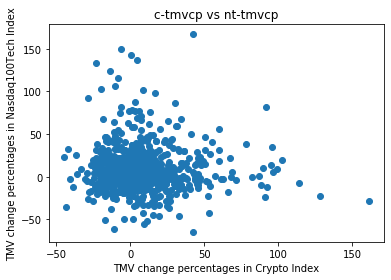

In [11]:
# Scatter plots
# c-tmvcp vs n_tmvcp
plt.clf()
ctmv = data.map(lambda x: x[2]).collect()
ntmv = data.map(lambda x: x[4]).collect()
fig1 = plt.figure(1, figsize=(7, 7))
plt.xlabel('TMV change percentages in Crypto Index')
plt.ylabel('TMV change percentages in Nasdaq100 Index')
plt.title('c-tmvcp vs n-tmvcp')
plt.scatter(ctmv,ntmv)
fig1.savefig('c-tmvcp vs n-tmvcp.png', dpi=600)
# c-tmvcp vs sp_tmvcp
plt.clf()
ctmv = data.map(lambda x: x[2]).collect()
sptmv = data.map(lambda x: x[6]).collect()
fig2 = plt.figure(1, figsize=(7, 7))
plt.xlabel('TMV change percentages in Crypto Index')
plt.ylabel('TMV change percentages in S&P100 Index')
plt.title('c-tmvcp vs sp-tmvcp')
plt.scatter(ctmv,sptmv)
fig2.savefig('c-tmvcp vs sp-tmvcp.png', dpi=600)
# c-tmvcp vs nt_tmvcp
plt.clf()
ctmv = data.map(lambda x: x[2]).collect()
nttmv = data.map(lambda x: x[8]).collect()
fig3 = plt.figure(1, figsize=(7, 7))
plt.xlabel('TMV change percentages in Crypto Index')
plt.ylabel('TMV change percentages in Nasdaq100Tech Index')
plt.title('c-tmvcp vs nt-tmvcp')
plt.scatter(ctmv,nttmv)
fig3.savefig('c-tmvcp vs nt-tmvcp.png', dpi=600)

In [ ]:
# The plots display the overall distribution of the changes in crypto index against each stock index considered 

In [12]:
data_df = data.toDF(('DATE', 'C_PCP', 'C_TMVCP', 'N_PCP', 'N_TMVCP', 'SP_PCP', 'SP_TMVCP', 'NT_PCP', 'NT_TMVCP'))

In [13]:
# Simple correlation metric
data_df.registerTempTable('data')
# c-pcp vs n_pcp
print('Correlation between daily average price change percentages between the crypto index and nasdaq100')
cor1 = sqlContext.sql('SELECT ((AVG(C_PCP * N_PCP) - (AVG(C_PCP) * AVG(N_PCP))) / (STDDEV(C_PCP) * STDDEV(N_PCP))) AS CORRELATION FROM DATA ')
# c-pcp vs sp_pcp
print('Correlation between daily average price change percentages between the crypto index and sp100')
cor1 = sqlContext.sql('SELECT ((AVG(C_PCP * SP_PCP) - (AVG(C_PCP) * AVG(SP_PCP))) / (STDDEV(C_PCP) * STDDEV(SP_PCP))) AS CORRELATION FROM DATA ')
cor1.show()
# c-pcp vs nt_pcp
print('Correlation between daily average price change percentages between the crypto index and nasdaqTech100')
cor1 = sqlContext.sql('SELECT ((AVG(C_PCP * NT_PCP) - (AVG(C_PCP) * AVG(NT_PCP))) / (STDDEV(C_PCP) * STDDEV(NT_PCP))) AS CORRELATION FROM DATA ')
cor1.show()

Correlation between daily average price change percentages between the crypto index and nasdaq100
+------------------+
|       CORRELATION|
+------------------+
|0.2554647488693455|
+------------------+

Correlation between daily average price change percentages between the crypto index and sp100
+-------------------+
|        CORRELATION|
+-------------------+
|0.22803170694955074|
+-------------------+

Correlation between daily average price change percentages between the crypto index and nasdaqTech100
+-------------------+
|        CORRELATION|
+-------------------+
|0.25398644621516653|
+-------------------+



In [ ]:
# COMMENT

In [14]:
# Simple correlation metric
# c-tmvcp vs n_tmvcp
print('Correlation between daily average traded monetary volume change percentages between the crypto index and nasdaq100')
cor1 = sqlContext.sql('SELECT ((AVG(C_TMVCP * N_TMVCP) - (AVG(C_TMVCP) * AVG(N_TMVCP))) / (STDDEV(C_TMVCP) * STDDEV(N_TMVCP))) AS CORRELATION FROM DATA ')
cor1.show()
# c-tmvcp vs sp_tmvcp
print('Correlation between daily average traded monetary volume change percentages between the crypto index and sp100')
cor1 = sqlContext.sql('SELECT ((AVG(C_TMVCP * SP_TMVCP) - (AVG(C_TMVCP) * AVG(SP_TMVCP))) / (STDDEV(C_TMVCP) * STDDEV(SP_TMVCP))) AS CORRELATION FROM DATA ')
cor1.show()
# c-tmvcp vs nt_tmvcp
print('Correlation between daily average traded monetary volume change percentages between the crypto index and nasdaqTech100')
cor1 = sqlContext.sql('SELECT ((AVG(C_TMVCP * NT_TMVCP) - (AVG(C_TMVCP) * AVG(NT_TMVCP))) / (STDDEV(C_TMVCP) * STDDEV(NT_TMVCP))) AS CORRELATION FROM DATA ')
cor1.show()

Correlation between daily average traded monetary volume change percentages between the crypto index and nasdaq100
+--------------------+
|         CORRELATION|
+--------------------+
|-0.00409274641338...|
+--------------------+

Correlation between daily average traded monetary volume change percentages between the crypto index and sp100
+--------------------+
|         CORRELATION|
+--------------------+
|0.020747691553493153|
+--------------------+

Correlation between daily average traded monetary volume change percentages between the crypto index and nasdaqTech100
+--------------------+
|         CORRELATION|
+--------------------+
|-0.02779351180686...|
+--------------------+



In [ ]:
# COMMENT
# this correlation is doesn't take into account the series nature of the data
#       and doesn't reveal any temporal correlation for the time series data
# but from simply observing this numerically, crypto shows a small positive correlation in the price changes with the stocks
#          although not significant
# but the traded volume changes show almost zero correlation which could be an indicator that the money flow into 
#     these two markets could be very much independent
# We shall look into the correlation in more detail in the third analysis task

In [ ]:
# VISUALISATION PLOT
